# Baker-Hubbard Hydrogen Bond Identification

In [3]:
%matplotlib inline
import itertools

import matplotlib.pyplot as plt

import mdtraj as md
import mdtraj.testing

Load up some example data. This is a little 28 residue peptide

In [4]:
t = md.load_pdb("https://www.rcsb.org/pdb/files/2EQQ.pdb")
print(t)

<mdtraj.Trajectory with 20 frames, 423 atoms, 28 residues, without unitcells>


`md.baker_hubbard` identifies hydrogen bonds baced on cutoffs
for the Donor-H...Acceptor distance and angle. The criterion employed
is $\theta > 120$ and $r_\text{H...Acceptor} < 2.5 A$ in
at least 10% of the trajectory. The return value is a list of the 
indices of the atoms (donor, h, acceptor) that satisfy this criteria.

In [ ]:
hbonds = md.baker_hubbard(t, periodic=False)


def label(hbond):
    return f"{t.topology.atom(hbond[0])} -- {t.topology.atom(hbond[2])}"


for hbond in hbonds:
    print(label(hbond))

GLU1-N -- GLU1-OE2
GLU1-N -- GLU1-OE1
GLY6-N -- SER4-O
CYS7-N -- GLY5-O
TYR11-N -- VAL8-O
MET12-N -- LYS20-O
ARG13-NH1 -- TYR11-O
THR14-N -- ARG18-O
ASP16-N -- ASP16-OD1
GLY17-N -- THR14-O
ARG18-N -- THR14-OG1
ARG18-NE -- ASP16-OD2
LYS20-N -- MET12-O
THR22-N -- GLY10-O
THR14-OG1 -- ASP16-OD1
THR28-OG1 -- ILE27-O


Let's compute the actual distances between the donors and acceptors

In [6]:
da_distances = md.compute_distances(t, hbonds[:, [0, 2]], periodic=False)

And plot a histogram for a few of them

Text(0.5, 0, 'Donor-acceptor distance [nm]')

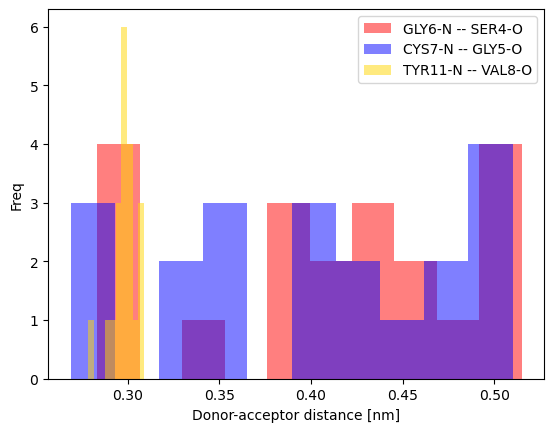

In [7]:
color = itertools.cycle(["r", "b", "gold"])
for i in [2, 3, 4]:
    plt.hist(da_distances[:, i], color=next(color), label=label(hbonds[i]), alpha=0.5)
plt.legend()
plt.ylabel("Freq")
plt.xlabel("Donor-acceptor distance [nm]")